# All KNN

AllKNN là một phiên bản mở rộng của Edited Nearest Neighbours (ENN) bằng cách tăng số lượng láng giềng được sử dụng để loại bỏ hoặc giữ lại các quan sát trong mỗi vòng lặp.

Thuật toán bắt đầu bằng việc xem xét láng giềng gần nhất đầu tiên.

Nó kết thúc khi đạt đến số lượng láng giềng tối đa được xác định bởi người dùng.

Nếu lớp đa số trở thành lớp thiểu số hoặc biến mất, thuật toán sẽ dừng lại sớm.

AllKNN là một sự lặp lại của ENN, bắt đầu bằng việc xem xét láng giềng gần nhất đầu tiên và tăng số láng giềng thêm 1 sau mỗi vòng lặp.

Các lần lặp sẽ kết thúc sau khi xem xét số lượng láng giềng tối đa nhập vào bởi người dùng, hoặc khi một lớp biến mất hoặc trở thành lớp thiểu số, tùy thuộc vào điều gì xảy ra trước.

Việc thêm một láng giềng trong mỗi lần lặp làm cho tiêu chí để giữ lại một mẫu trở nên khó khăn hơn, do đó loại bỏ nhiều quan sát gần ranh giới của lớp thiểu số.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import (
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN
)

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with AllKNN

[AllKNN](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.AllKNN.html)


### Well separated classes

In [8]:
# create data

X, y = make_data(sep=2)
allknn = AllKNN(
    sampling_strategy='auto',  # undersamples only the majority class
    n_neighbors=5, # the maximum size of the neighbourhood to examine
    kind_sel='all',  # all neighbours need to have the same label as the observation examined
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = allknn.fit_resample(X, y)

In [9]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((954, 2), (954,))

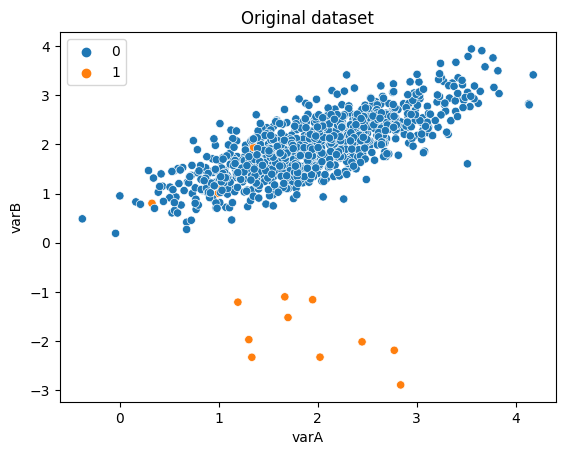

In [12]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

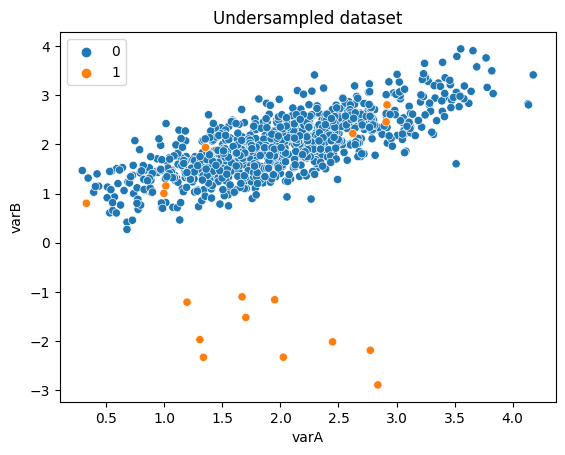

In [13]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the other class were removed from the data set.

### Partially separated classes

Let's repeat the same exercise in data where the classes are not so clearly separated. 

In [15]:
# create data
X, y = make_data(sep=0)
allknn = AllKNN(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3, # the maximum size of the neighbourhood to examine
    kind_sel='all',  # all neighbours need to agree
    n_jobs=4)  # I have 4 cores in my laptop


X_resampled, y_resampled = allknn.fit_resample(X, y)

In [16]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [18]:
y.value_counts()

0    983
1     17
dtype: int64

In [17]:
# undersampled data

X_resampled.shape, y_resampled.shape

((947, 2), (947,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

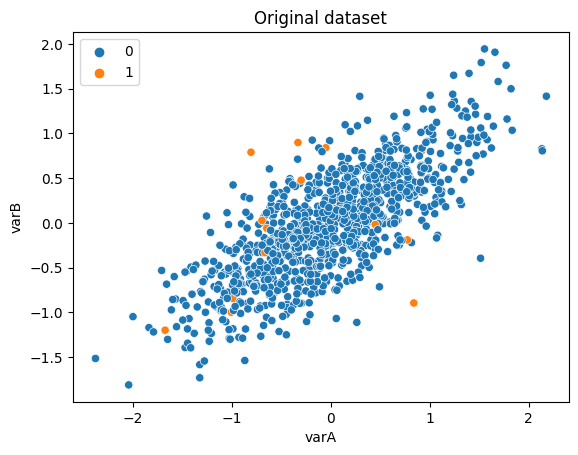

In [19]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

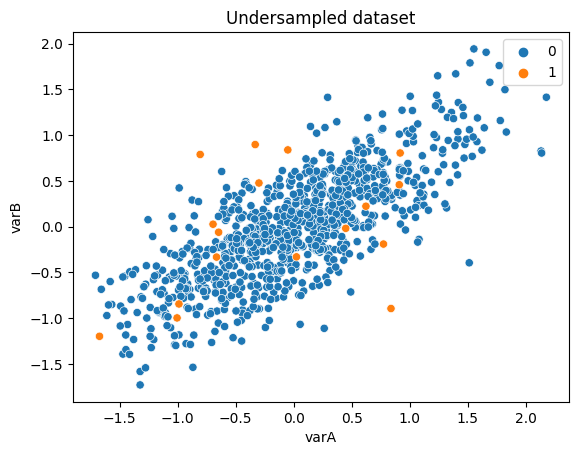

In [20]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()